# Fetch_California_Housing Dataset Analsys
### by Mohamed Tarek 

### Importing necessary libraries

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Loading and Inspection

In [3]:
#Load the California housing dataset
california_housing = fetch_california_housing(as_frame=True)
housing = california_housing.frame

### Project Implementation

In [ ]:
#Display first 5 rows
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Display last 5 rows
housing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
housing.shape

(20640, 9)

In [ ]:
#Getting data information 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
#Describing statistical information
housing.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Data Cleaning

In [12]:
#Detecting Missing Values
housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [13]:
#Applying Custom Functions with apply()
def houseval_dolar_to_pound(x):
    return x * 50
housing['HouseVal_Pounds'] = housing['MedHouseVal'].apply(houseval_dolar_to_pound)

In [14]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseVal_Pounds
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,226.30
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,179.25
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,176.05
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,170.65
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,171.10


### Exploratory Data Analysis (EDA)

#### Distribution of the target variable (Median House Value)

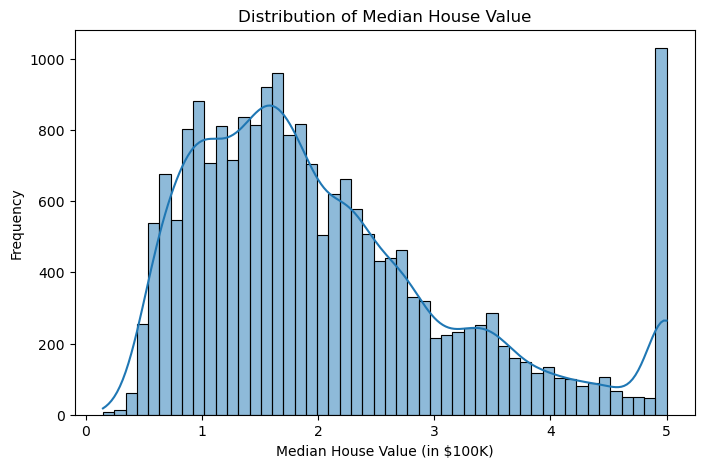

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(housing['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100K)')
plt.ylabel('Frequency')
plt.show()

>A histogram shows the distribution of median house values, providing insights into the price range of houses in California.

>Most California houses are valued between $100k–$300k, peaking at $150k–$200k, with few high-end houses capped at $500k.

#### Correlation matrix heatmap

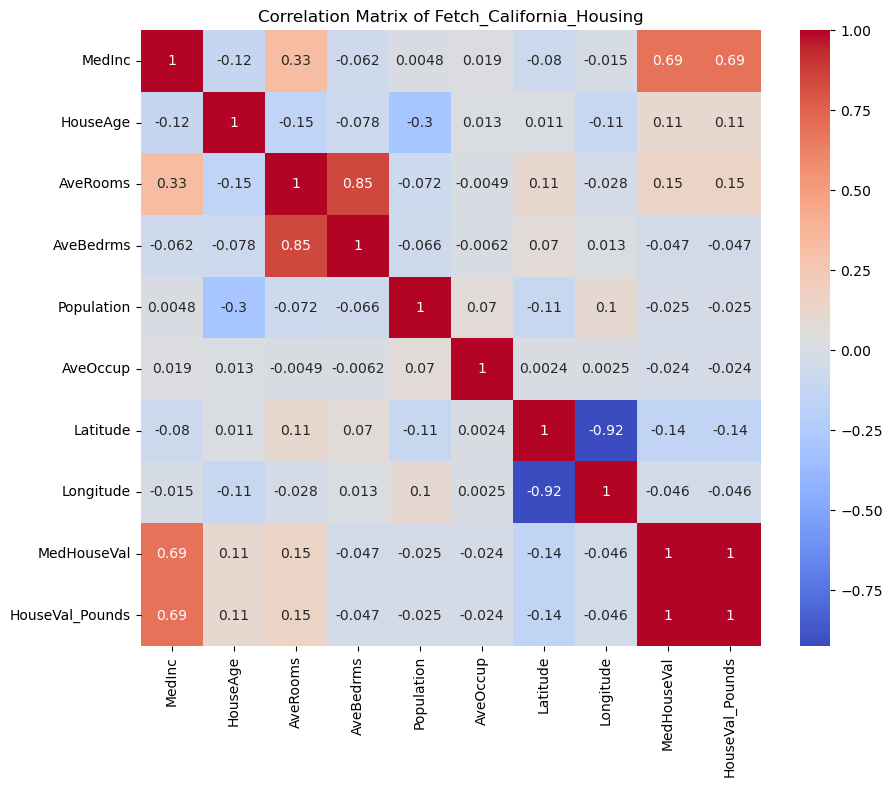

In [ ]:
#Select only numerical columns for the correlation matrix
California_Housing = housing.select_dtypes(include=['float64', 'int64'])

#Compute the correlation matrix
corr = California_Housing.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Fetch_California_Housing')
plt.show()

>The heatmap visualizes correlations between numerical features, helping to identify relationships that may influence survival.

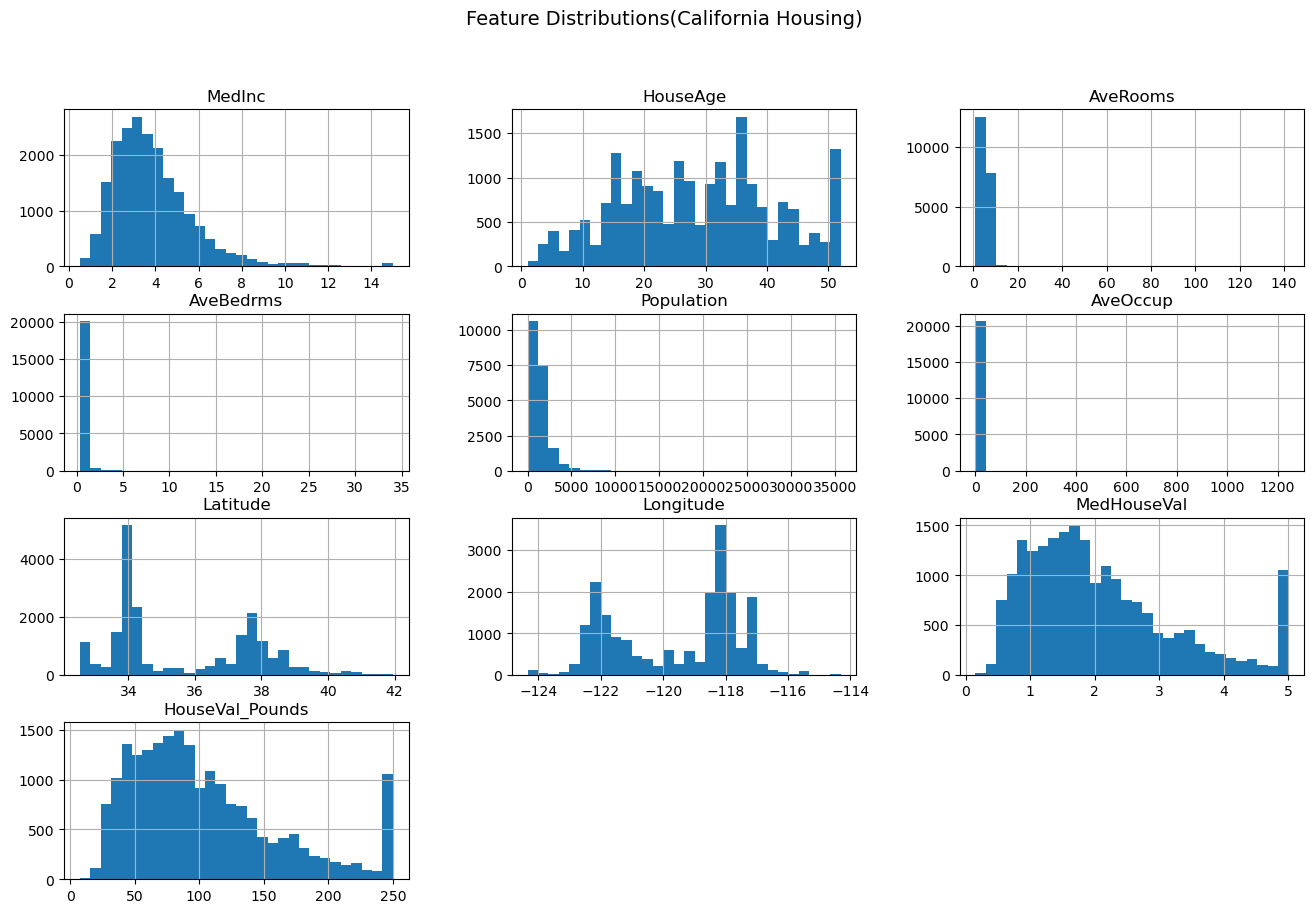

In [19]:
#Distribution of California Housing
housing.hist(bins=30,figsize=(16, 10))
plt.suptitle('Feature Distributions(California Housing)',fontsize=14)
plt.show()

>From above histograms it's clear that most of the features are skewed, It seems that housing median age and median housing value have been capped a the end (Peak at the end).

#### Pair plot of selected features

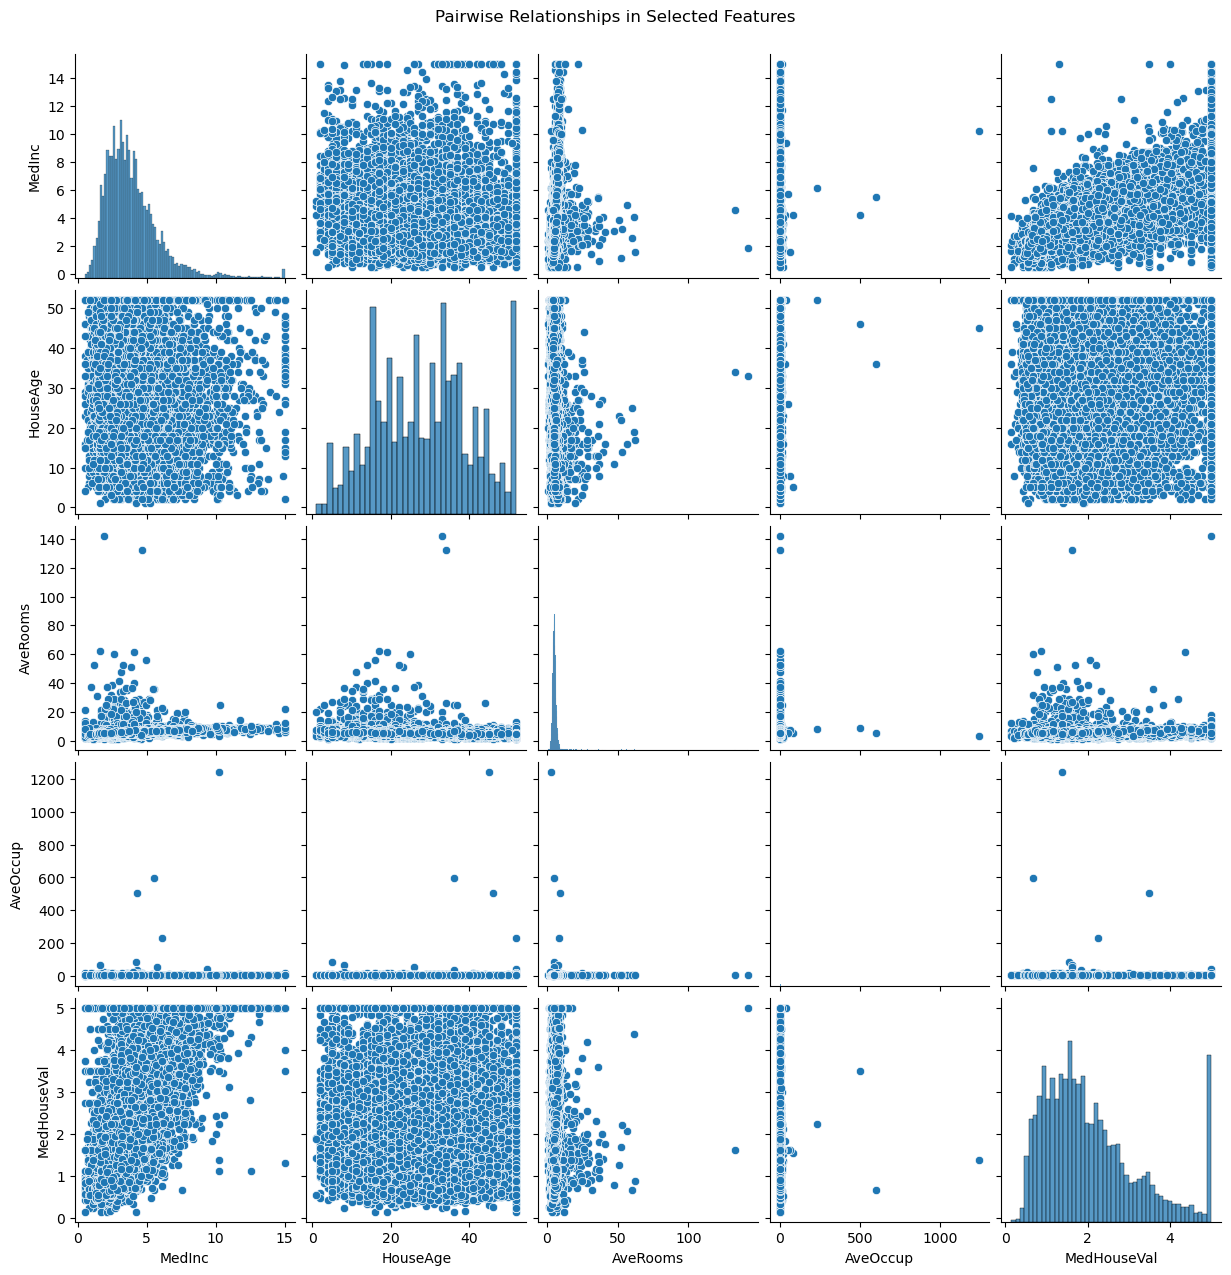

In [20]:
sns.pairplot(housing[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])
plt.suptitle("Pairwise Relationships in Selected Features", y=1.02)
plt.show()

>A pair plot shows relationships between selected features, providing insights into how features are interrelated and how they relate to the target variable.

#### Scatter plot of median income vs. median house value

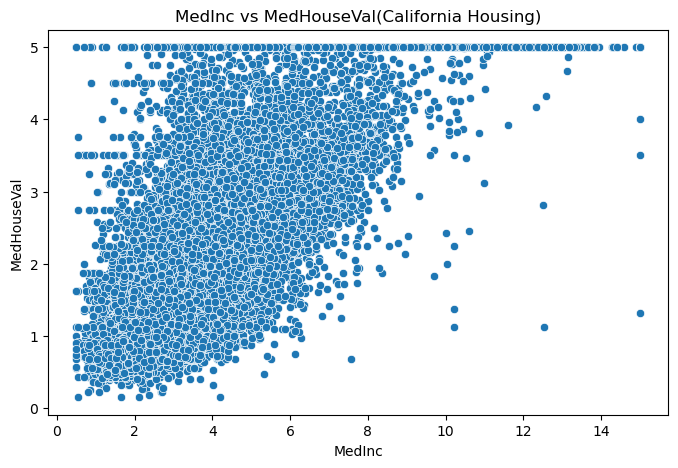

In [21]:
#Explains the relationship between median income and median house value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=housing)
plt.title('MedInc vs MedHouseVal(California Housing)')
plt.show()

>this scatterpolt shows a clear positive relationship, As median income increases, median house value also tend to increase.

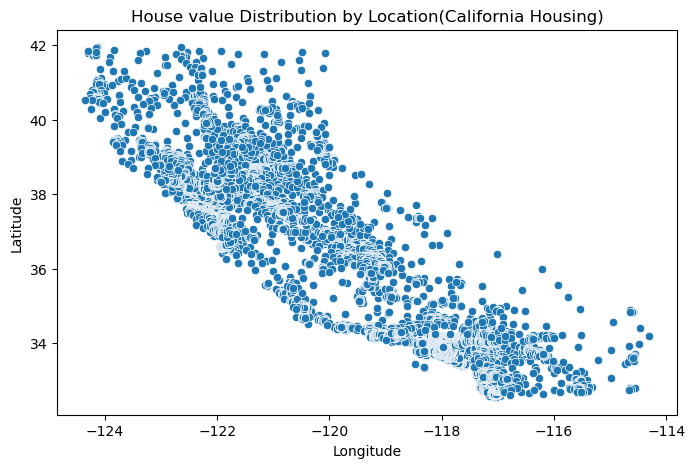

In [22]:
#Explains the relationship between latitude and longitude
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Longitude', y='Latitude', data=housing)
plt.title('House value Distribution by Location(California Housing)')
plt.show()

>this scatterpolt shows that The geographical location has a significant impact on the value of the property, such as in reality, houses in certain areas are more expensive.

>There are special areas (north/south) with higher prices.

#### Relationship Between Population and House Value

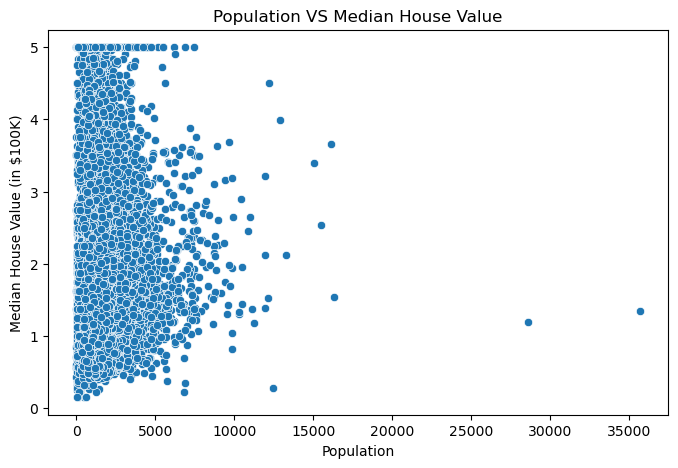

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Population', y='MedHouseVal', data=housing)
plt.title('Population VS Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value (in $100K)')
plt.show()

>A scatter plot shows how the population in a given area relates to house prices, which can reveal whether more populated areas tend to have higher or lower house values.

#### Average Number of Rooms VS House Value

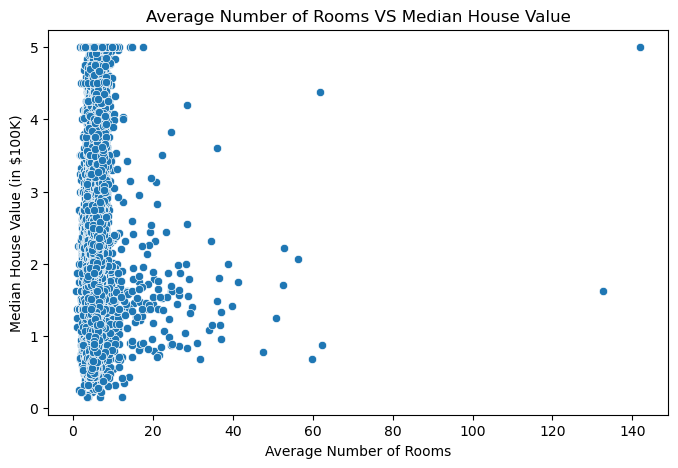

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=housing)
plt.title('Average Number of Rooms VS Median House Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (in $100K)')
plt.show()

>This scatter plot helps to visualize the relationship between the average number of rooms in a house and its median value, showing whether more rooms correlate with higher prices.

#### Distribution of House Age

>A histogram shows the distribution of house ages, highlighting the most common age range of houses in the dataset. This helps to understand the age demographics of the housing market.

#### House Value by Proximity to the Ocean

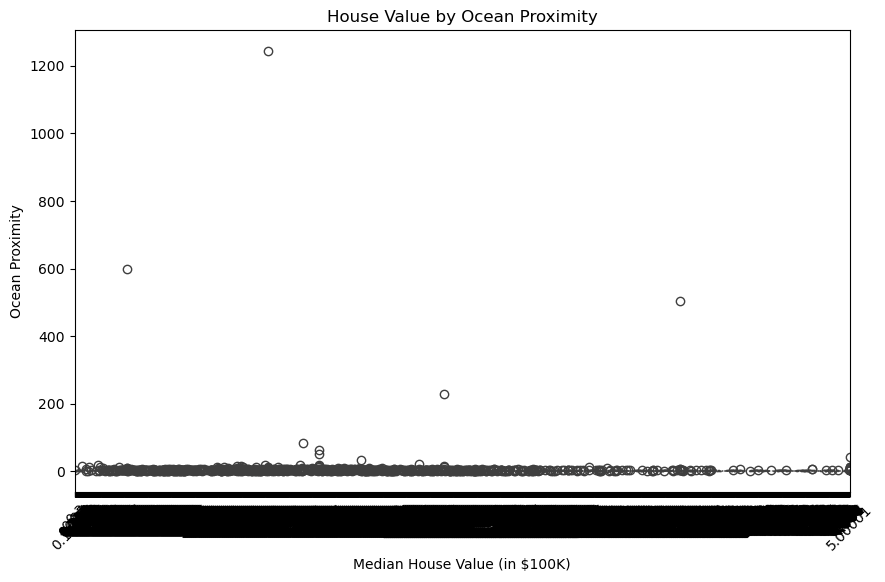

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing['MedHouseVal'], y=housing['AveOccup'])
plt.title('House Value by Ocean Proximity')
plt.xlabel('Median House Value (in $100K)')
plt.ylabel('Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

>This box plot shows the distribution of house values based on their proximity to the ocean, highlighting the impact of location (especially coastal proximity) on real estate prices.

#### Density Plot for Total Number of Rooms

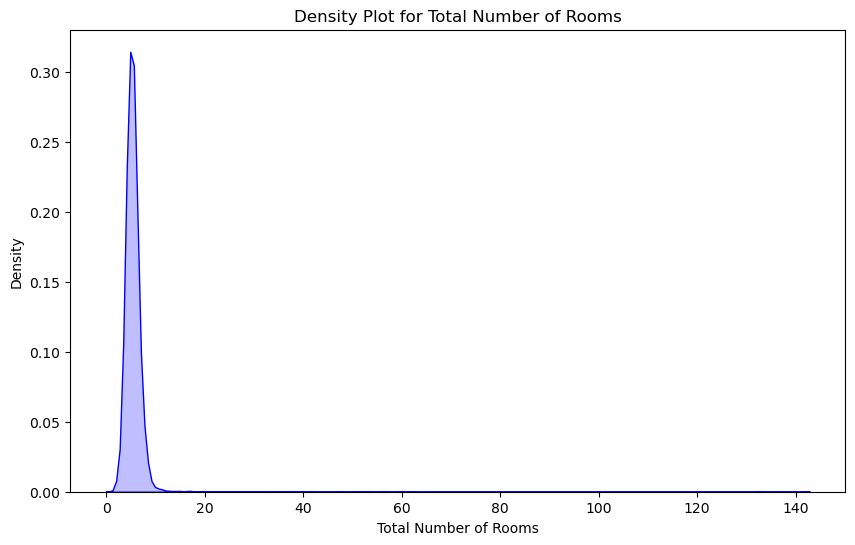

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=housing, x='AveRooms', fill=True, color='blue')
plt.title('Density Plot for Total Number of Rooms')
plt.xlabel('Total Number of Rooms')
plt.ylabel('Density')
plt.show()

>A KDE plot shows the density distribution of the total number of rooms across all houses, providing insights into typical housing sizes and any potential skew in room count.

#### Relationship Between Median Income and House Age

<Figure size 800x500 with 0 Axes>

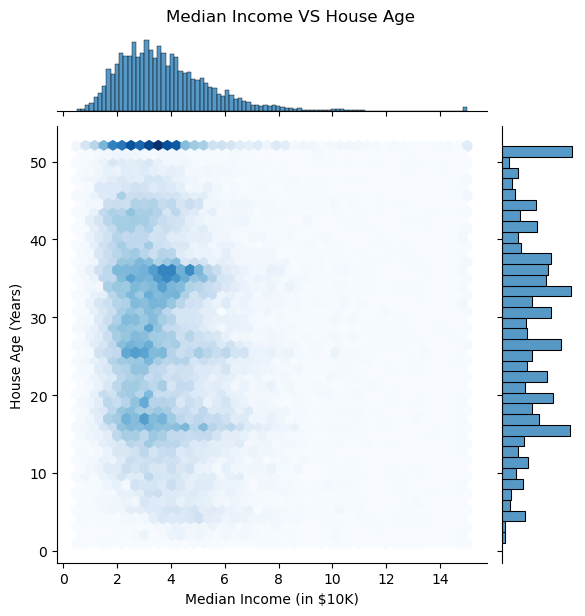

In [28]:
plt.figure(figsize=(8, 5))
sns.jointplot(x='MedInc', y='HouseAge', data=housing, kind='hex', cmap='Blues')
plt.suptitle('Median Income VS House Age', y=1.02)
plt.xlabel('Median Income (in $10K)')
plt.ylabel('House Age (Years)')
plt.show()

>A joint plot shows the relationship between median income and house age, revealing patterns such as whether newer houses are built in higher-income areas.

#### Average Occupancy VS House Value

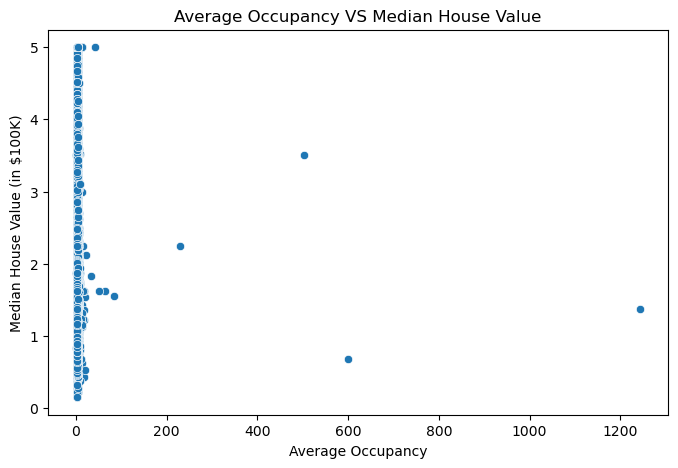

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AveOccup', y='MedHouseVal', data=housing)
plt.title('Average Occupancy VS Median House Value')
plt.xlabel('Average Occupancy')
plt.ylabel('Median House Value (in $100K)')
plt.show()

>This scatter plot shows how the average number of occupants per house relates to house value, which can indicate how population density in households impacts pricing.

Pair Plot of Engineered Features

### Feature Engineering

In [30]:
#Create a new feature: Total rooms per household
housing['RoomsPerHousehold'] = housing['AveRooms'] / housing['AveOccup']

#Create a new feature: Total bedrooms per room
housing['BedPerRoom'] = housing['AveBedrms'] / housing['AveRooms']

#Display the first few rows to show new features
print(housing[['RoomsPerHousehold', 'BedPerRoom']].head())

   RoomsPerHousehold  BedPerRoom
0           2.732919    0.146591
1           2.956685    0.155797
2           2.957661    0.129516
3           2.283154    0.184458
4           2.879646    0.172096


### Additional Data Visualizations

#### KDE plot of house age distribution

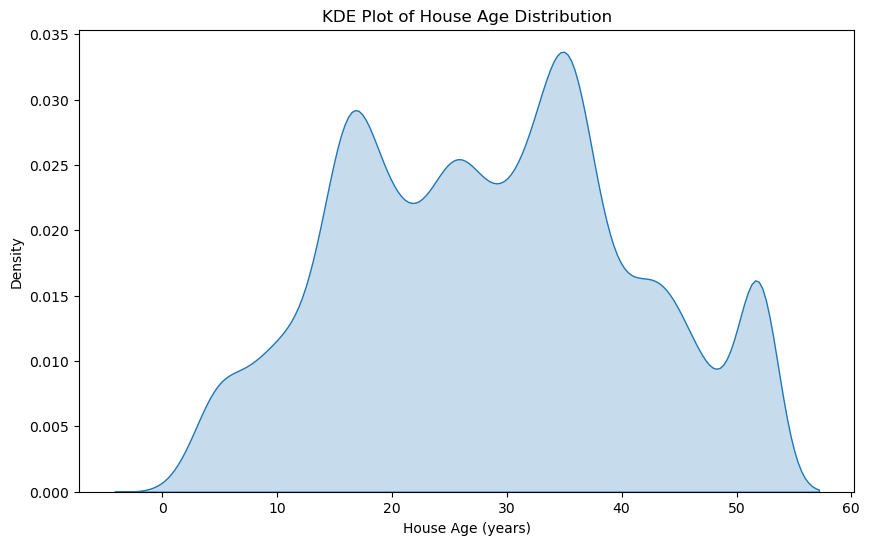

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=housing, x='HouseAge', fill=True)
plt.title('KDE Plot of House Age Distribution')
plt.xlabel('House Age (years)')
plt.ylabel('Density')
plt.show()

>A KDE plot shows the distribution of house ages in the dataset, providing insights into the common age of houses.

### Summary of Analysis

*   **House Value Distribution**: Most houses are valued below $300,000, with a skew towards higher-priced homes due to a small number of expensive properties.

*   **Income and House Value**: Higher median income is strongly correlated with higher house values, indicating that wealthier neighborhoods have more expensive homes.

*   **House Age**: The majority of houses are relatively old, with the highest concentration around 30-40 years, showing a mix of old and new developments.

*   **Rooms and House Value**: Houses with more rooms generally have higher median values, highlighting the importance of space in real estate pricing.
*  **Ocean Proximity**: Houses closer to the ocean tend to have higher values, emphasizing the premium associated with coastal locations.


*   **Population Impact**: No direct relationship between population size and house prices, suggesting other factors play a more significant role.


*   **Feature Correlations**: Features such as the number of rooms and median income show strong correlations with house values, making them key indicators in property valuation.


*   **Occupancy and House Value**: Higher occupancy levels correlate with lower house values, indicating a preference for less crowded living conditions.

### LinearRegression

In [32]:
#Features
x = housing[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
#Target
y = housing['MedHouseVal']

In [33]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared error:", mse)
print("Mean Absolute error:", mae)

Mean Squared error: 0.555891598695244
Mean Absolute error: 0.5332001304956552


In [34]:
r2 = r2_score(y_test, y_pred)
print(r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.5757877060324511
0.7455813830127761


In [35]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseVal_Pounds,RoomsPerHousehold,BedPerRoom
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,226.30,2.732919,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,179.25,2.956685,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,176.05,2.957661,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,170.65,2.283154,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,171.10,2.879646,0.172096


In [36]:
#Add new column
regions = ['north', 'south', 'east', 'west']
housing['Region'] = [regions[i % 4] for i in range(len(housing))]

In [38]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseVal_Pounds,RoomsPerHousehold,BedPerRoom,Region
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,226.30,2.732919,0.146591,north
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,179.25,2.956685,0.155797,south
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,176.05,2.957661,0.129516,east
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,170.65,2.283154,0.184458,west
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,171.10,2.879646,0.172096,north


### Encoding

In [42]:
#Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
housing['Region_Encoded'] = label_encoder.fit_transform(housing['Region'])

In [43]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseVal_Pounds,RoomsPerHousehold,BedPerRoom,Region,Region_Encoded
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,226.30,2.732919,0.146591,north,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,179.25,2.956685,0.155797,south,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,176.05,2.957661,0.129516,east,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,170.65,2.283154,0.184458,west,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,171.10,2.879646,0.172096,north,1


In [45]:
#Drop column
housing = housing.drop('HouseVal_Pounds', axis=1)

### Scaling

In [48]:
#Apply Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing[['MedInc_St', 'HouseAge_St', 'Population_St']] = scaler.fit_transform(housing[['MedInc', 'HouseAge', 'Population']])

In [49]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedPerRoom,Region,Region_Encoded,MedInc_St,HouseAge_St,Population_St
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,north,1,2.344766,0.982143,-0.974429
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,south,2,2.332238,-0.607019,0.861439
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,east,0,1.782699,1.856182,-0.820777
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,west,3,0.932968,1.856182,-0.766028
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,north,1,-0.012881,1.856182,-0.759847
